An exoplanet, or extrasolar planet, is a planet that orbits a star other than our Sun. Exoplanets were first discovered in 1992, and since then thousands of exoplanets have been identified using a variety of methods, including radial velocity, transit photometry, microlensing, and direct imaging.

Exoplanets come in a wide range of sizes, from smaller than Earth to larger than Jupiter, and they can have a wide range of orbital characteristics, including eccentric orbits, close-in orbits, and highly inclined orbits. Some exoplanets have been found in the habitable zones of their stars, where liquid water could exist on their surfaces, making them potential targets in the search for extraterrestrial life.

The study of exoplanets has revolutionized our understanding of planetary systems, and has provided new insights into how planets form and evolve. By observing and characterizing exoplanets, astronomers can gain insights into the processes that govern planetary formation, as well as the conditions necessary for habitability.

Furthermore, the discovery of exoplanets has provided new opportunities to study planetary atmospheres and composition, as well as the potential for discovering new types of planets that do not exist in our own solar system.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf55
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
from scikeras.wrappers import KerasClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [2]:
# Load the data
training_data = pd.read_csv('exoTrain.csv')
test_data = pd.read_csv('exoTest.csv')

In [3]:
training_data.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [4]:
training_data.shape

(5087, 3198)

In [5]:
training_data["LABEL"] = training_data["LABEL"].replace({2: 1, 1: 0})
test_data["LABEL"] = test_data["LABEL"].replace({2: 1, 1: 0})

In [6]:
training_data.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [8]:
training_data.dtypes

LABEL          int64
FLUX.1       float64
FLUX.2       float64
FLUX.3       float64
FLUX.4       float64
              ...   
FLUX.3193    float64
FLUX.3194    float64
FLUX.3195    float64
FLUX.3196    float64
FLUX.3197    float64
Length: 3198, dtype: object

In [9]:
training_data.isna().sum()

LABEL        0
FLUX.1       0
FLUX.2       0
FLUX.3       0
FLUX.4       0
            ..
FLUX.3193    0
FLUX.3194    0
FLUX.3195    0
FLUX.3196    0
FLUX.3197    0
Length: 3198, dtype: int64

In [10]:
training_data.nunique()

LABEL           2
FLUX.1       4958
FLUX.2       4970
FLUX.3       4950
FLUX.4       4947
             ... 
FLUX.3193    4899
FLUX.3194    4877
FLUX.3195    4837
FLUX.3196    4832
FLUX.3197    4838
Length: 3198, dtype: int64

In [11]:
training_data.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,0.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,0.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,0.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,0.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,0.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,1.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


Plot

In [13]:
training_data['LABEL'].value_counts()


0    5050
1      37
Name: LABEL, dtype: int64

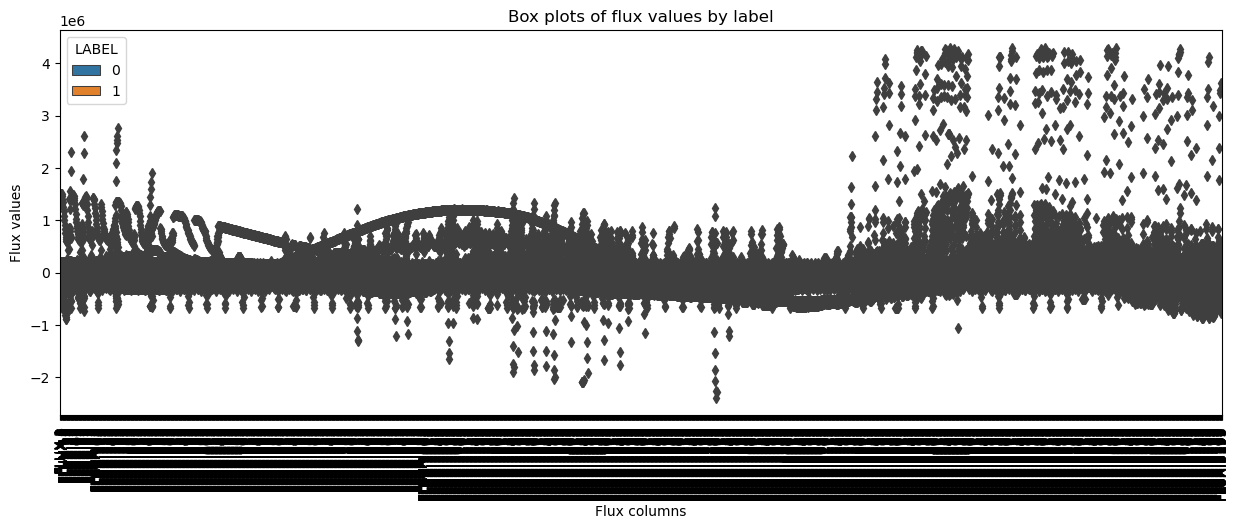

In [10]:
def plot_boxplots(data, figsize=(15, 5)):
    flux_columns = [col for col in data.columns if 'FLUX' in col]
    melted_data = data.melt(id_vars='LABEL', value_vars=flux_columns, var_name='FLUX', value_name='Value')
    plt.figure(figsize=figsize)
    sns.boxplot(x='FLUX', y='Value', hue='LABEL', data=melted_data)
    plt.xlabel("Flux columns")
    plt.ylabel("Flux values")
    plt.title("Box plots of flux values by label")
    plt.xticks(rotation=90)
    plt.show()

plot_boxplots(training_data)


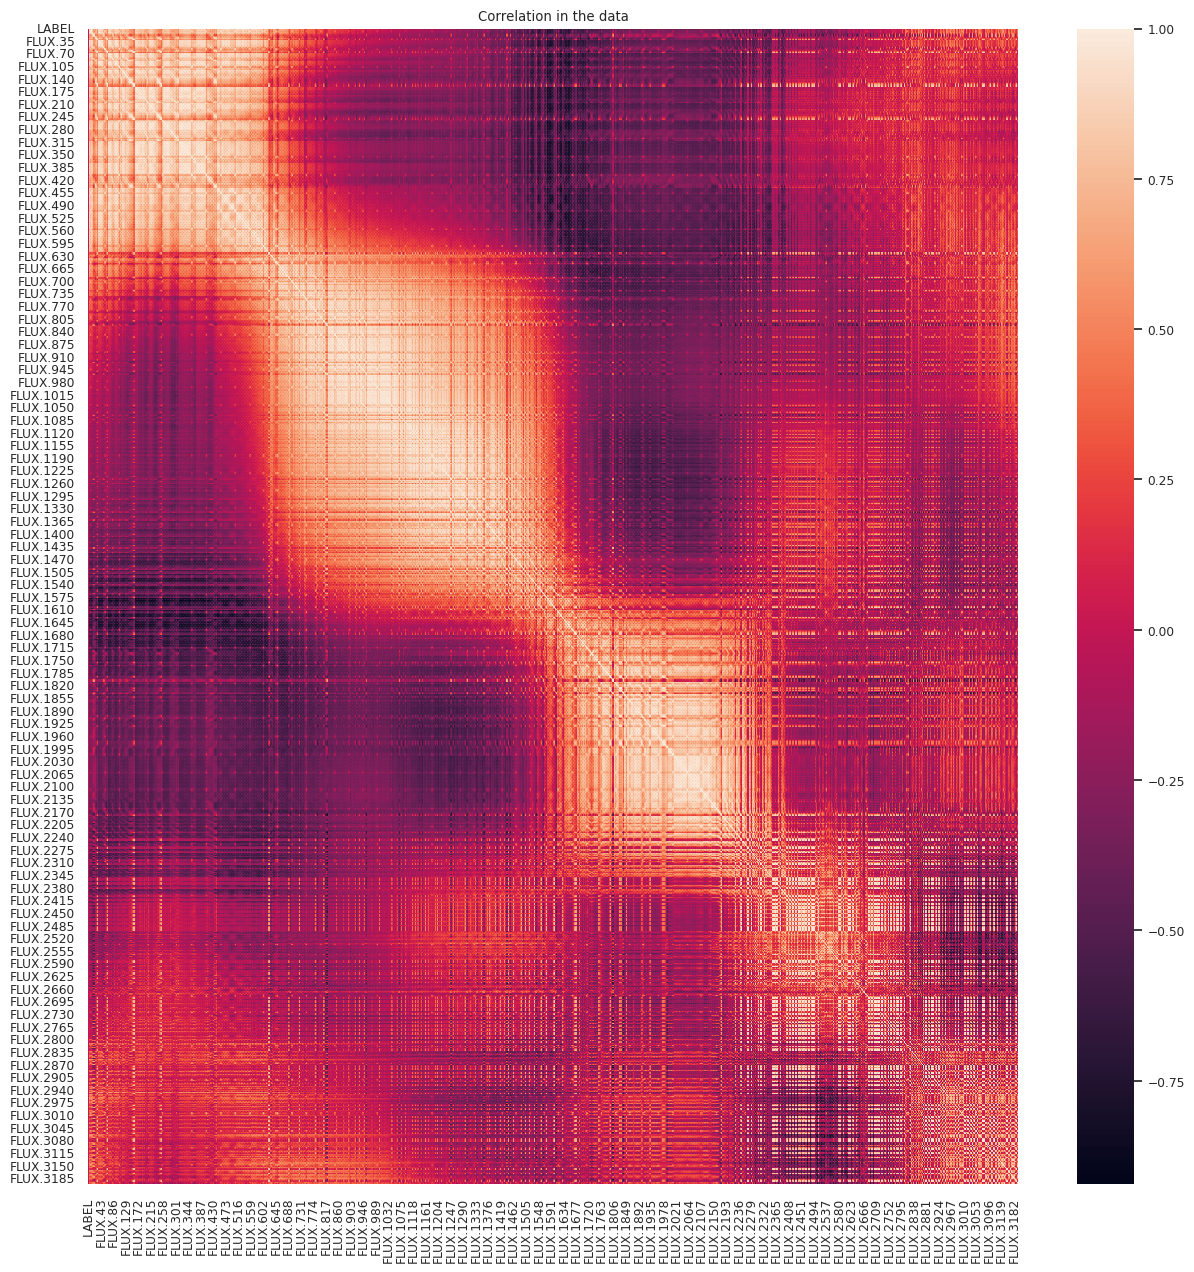

In [41]:
def plot_correlation_matrix(data, figsize=(15, 15)):
    plt.figure(figsize=figsize)
    sns.heatmap(data.corr())
    plt.title('Correlation in the data')
    plt.show()

plot_correlation_matrix(training_data)

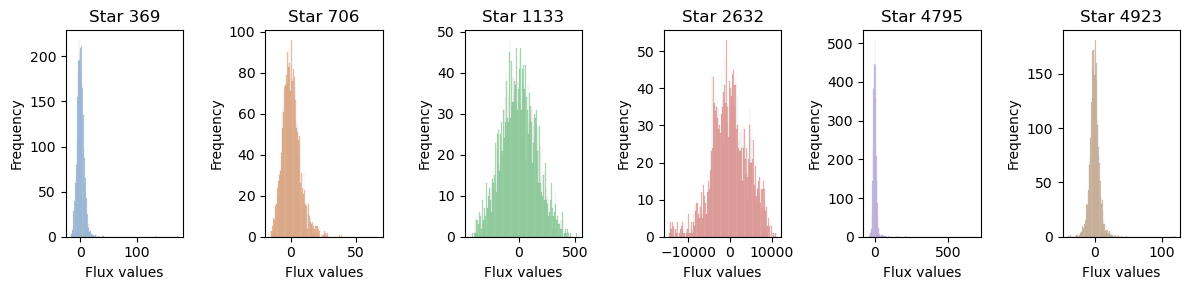

In [13]:
from random import randint
def plot_flux_histograms(data, indices, figsize=(12, 3), bins=200, palette=None):
    fig, axes = plt.subplots(nrows=1, ncols=len(indices), figsize=figsize)
    
    if palette is None:
        palette = sns.color_palette("pastel", len(indices))

    for i, index in enumerate(indices):
        ax = axes[i]
        sns.histplot(data=data.iloc[index, :], bins=bins, kde=False, ax=ax, color=palette[i])
        ax.set_title(f"Star {index}")
        ax.set_xlabel("Flux values")
        ax.set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

index = [randint(0,5000) for i in range(6)]
index.sort()
indices_to_plot = index
plot_flux_histograms(training_data, indices_to_plot)


In [16]:
# Separate labels and features for training and testing sets
train_labels = training_data.iloc[:, 0].values
train_features = training_data.iloc[:, 1:].values
test_labels = test_data.iloc[:, 0].values
test_features = test_data.iloc[:, 1:].values

# Normalize the data
scaler = MinMaxScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

# One-hot encode the labels
train_labels = tf.keras.utils.to_categorical(train_labels - 1, num_classes=2)
test_labels = tf.keras.utils.to_categorical(test_labels - 1, num_classes=2)


In [15]:
class RBFLayer(tf.keras.layers.Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = gamma

    def build(self, input_shape):
        self.centers = self.add_weight(name='centers',
                                       shape=(self.units, input_shape[1]),
                                       initializer='uniform',
                                       trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        return tf.exp(-self.gamma * tf.reduce_sum(tf.square(tf.expand_dims(inputs, axis=1) - self.centers), axis=2))

# Determine the number of RBF centers
n_centers = 100

# Perform KMeans clustering to find the RBF centers
kmeans = KMeans(n_clusters=n_centers, random_state=0).fit(train_features)
centers = kmeans.cluster_centers_
gamma = 1.0 / (2 * np.mean(kmeans.transform(train_features)))

# Define the RBFNN model
inputs = tf.keras.Input(shape=(train_features.shape[1],))
rbf_layer = RBFLayer(n_centers, gamma)(inputs)
output = tf.keras.layers.Dense(2, activation='softmax')(rbf_layer)
model = tf.keras.Model(inputs=inputs, outputs=output)


2023-04-06 01:26:31.125990: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-06 01:26:31.126028: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-06 01:26:31.126054: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (relaxe-Lenovo-Legion-5-15IMH05H): /proc/driver/nvidia/version does not exist
2023-04-06 01:26:31.126714: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_features, train_labels, epochs=100, batch_size=32, verbose=2)


Epoch 1/100
159/159 - 9s - loss: 0.6209 - accuracy: 0.9868 - 9s/epoch - 54ms/step
Epoch 2/100
159/159 - 8s - loss: 0.4976 - accuracy: 0.9927 - 8s/epoch - 49ms/step
Epoch 3/100
159/159 - 8s - loss: 0.4028 - accuracy: 0.9927 - 8s/epoch - 51ms/step
Epoch 4/100
159/159 - 8s - loss: 0.3302 - accuracy: 0.9927 - 8s/epoch - 49ms/step
Epoch 5/100
159/159 - 8s - loss: 0.2744 - accuracy: 0.9927 - 8s/epoch - 49ms/step
Epoch 6/100
159/159 - 8s - loss: 0.2313 - accuracy: 0.9927 - 8s/epoch - 51ms/step
Epoch 7/100
159/159 - 8s - loss: 0.1976 - accuracy: 0.9927 - 8s/epoch - 48ms/step
Epoch 8/100
159/159 - 8s - loss: 0.1710 - accuracy: 0.9927 - 8s/epoch - 52ms/step
Epoch 9/100
159/159 - 8s - loss: 0.1498 - accuracy: 0.9927 - 8s/epoch - 50ms/step
Epoch 10/100
159/159 - 8s - loss: 0.1326 - accuracy: 0.9927 - 8s/epoch - 48ms/step
Epoch 11/100
159/159 - 8s - loss: 0.1186 - accuracy: 0.9927 - 8s/epoch - 51ms/step
Epoch 12/100
159/159 - 8s - loss: 0.1071 - accuracy: 0.9927 - 8s/epoch - 50ms/step
Epoch 13/100


Epoch 100/100
159/159 - 9s - loss: 0.0431 - accuracy: 0.9927 - 9s/epoch - 56ms/step


In [18]:
# Evaluate the model
test_predictions = np.argmax(model.predict(test_features), axis=1)
test_labels_single = np.argmax(test_labels, axis=1)
accuracy = accuracy_score(test_labels_single, test_predictions)
print("Test accuracy:", accuracy)


18/18 [==============================] - 0s 11ms/step
Test accuracy: 0.9912280701754386


In [ ]:
def create_rbfnn_model():
    inputs = tf.keras.Input(shape=(train_features.shape[1],))
    rbf_layer = RBFLayer(n_centers, gamma)(inputs)
    output = tf.keras.layers.Dense(2, activation='softmax')(rbf_layer)
    model = tf.keras.Model(inputs=inputs, outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [22]:
# Prepare the data
X = np.concatenate((train_features, test_features), axis=0)
y = np.concatenate((training_data.iloc[:, 0].values, test_data.iloc[:, 0].values), axis=0)

# Create the RBFNN model with KerasClassifier
rbfnn_model = KerasClassifier(model=create_rbfnn_model, epochs=100, batch_size=32, verbose=0)

# Create other models
rf_model = RandomForestClassifier(n_estimators=100)
svm_model = SVC()

# Perform cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rbfnn_cv_scores = cross_val_score(rbfnn_model, X, y, cv=kfold, scoring='accuracy')
rf_cv_scores = cross_val_score(rf_model, X, y, cv=kfold, scoring='accuracy')
svm_cv_scores = cross_val_score(svm_model, X, y, cv=kfold, scoring='accuracy')

print("RBFNN Cross-Validation Accuracy: {:.2f}% (std: {:.2f}%)".format(rbfnn_cv_scores.mean() * 100, rbfnn_cv_scores.std() * 100))
print("Random Forest Cross-Validation Accuracy: {:.2f}% (std: {:.2f}%)".format(rf_cv_scores.mean() * 100, rf_cv_scores.std() * 100))
print("SVM Cross-Validation Accuracy: {:.2f}% (std: {:.2f}%)".format(svm_cv_scores.mean() * 100, svm_cv_scores.std() * 100))


/home/relaxe/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/relaxe/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/relaxe/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py", line 1494, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/relaxe/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py", line 762, in fit
    self._fit(
  File "/home/rela

RBFNN Cross-Validation Accuracy: nan% (std: nan%)
Random Forest Cross-Validation Accuracy: 99.26% (std: 0.04%)
SVM Cross-Validation Accuracy: 99.26% (std: 0.04%)
